In [1]:
import pandas as pd

In [4]:
player_data_import = pd.read_csv("players.csv")
player_data_import

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


In [9]:
player_data_import["height_inches"] = player_data_import["height"].apply(lambda x: int(x.split("-")[0]) * 12 + int(x.split("-")[1]) if len(x.split("-")) == 2 else int(x))
player_data_import

,nflId,height,weight,birthDate,collegeName,Position,displayName,height_inches
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,73
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,72
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,72
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,73
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,73
...,...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton,75
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes,75
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron,69
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill,73


Text(0.5, 1.0, 'Central Limit Theorem')

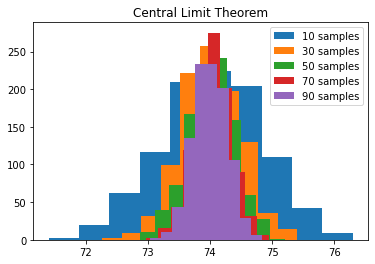

In [10]:
# Central Limit Theorem

import matplotlib.pyplot as plt

sample_amounts = range(10, 100, 20)

for x in sample_amounts:
    samples = []
    for i in range(1000):
        samples.append(player_data_import["height_inches"].sample(x).mean())
    plt.hist(samples)
plt.legend([str(z) + " samples" for z in sample_amounts])
plt.title("Central Limit Theorem")

In [11]:
# Standard Error

player_data_import["height_inches"].sem()

0.05065243293253027

In [15]:
# The Bootstrap

from sklearn.utils import resample

results = []
for nrepeat in range(1000):
    sample = resample(player_data_import["height_inches"])
    results.append(sample.mean())
results = pd.Series(results)
print('Bootstrap Statistics')
print(f'original: {player_data_import["height_inches"].median()}')
print(f'bias: {results.mean() - player_data_import["height_inches"].median()}')
print(f'std error: {results.std()}')

Bootstrap Statistics
original: 74.0
bias: 0.00956332357246481
std error: 0.052518941273804416


## Confidence Intervals

In [17]:
import numpy as np
import scipy.stats as st

#define sample data
data = player_data_import["height_inches"].sample(20)

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df = len(data)-1, loc = np.mean(data), scale=st.sem(data))


(72.66626760400652, 75.23373239599348)

In [20]:
#define sample data
np.random.seed(0)
data = player_data_import["height_inches"].sample(1500)

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df = len(data)-1, loc = np.mean(data), scale=st.sem(data))

(73.92579453716581, 74.1902054628342)

## Normal/Gaussian Distributions

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

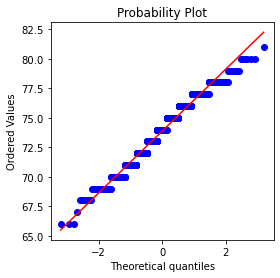

In [23]:
# QQ-plot

from scipy import stats

fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = player_data_import["height_inches"].sample(1000)
stats.probplot(norm_sample, plot=ax)